# **Image Processing Techniques**

# **1. Install OpenCV**




In [29]:
!pip install opencv-python-headless

# **2. Import Libraries**

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **3. Display Image**

In [31]:
def display_image(img,title="Image", figsize=(12,6)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis("off")
    plt.show()

def display_image_gray(img1,img2, title1="Image 1",  title2="Image 2", figsize=(12,6)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1, fontsize=16, fontweight='bold')
    plt.axis("off")


    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2, fontsize=16, fontweight='bold')
    plt.axis("off")

    plt.show()

# **3. Load Image**

Saving Ignacio-2x2.jpg to Ignacio-2x2 (3).jpg


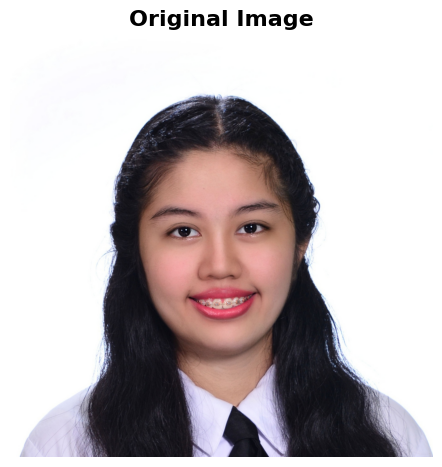

In [36]:
from google.colab import files
from io import BytesIO
from PIL import Image

upload = files.upload()

image_path = next(iter(upload))
image = Image.open(BytesIO(upload[image_path]))
image = cv2.cvtColor(np.array(image),cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

# **EXERCISE 1: SCALING AND ROTATION**

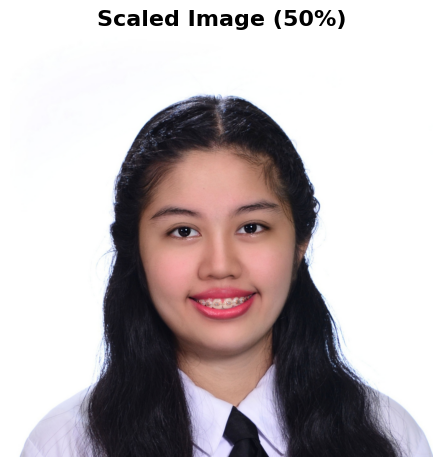

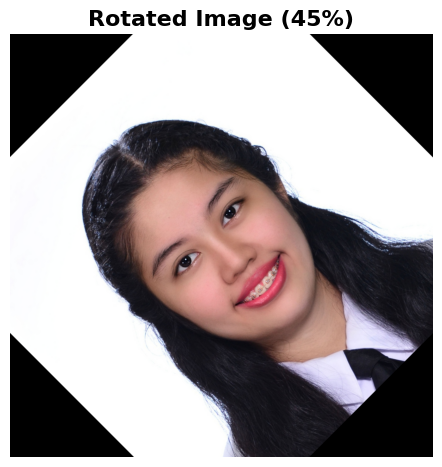

In [37]:
def scale_image(img, scale_factor):
  height, width = image.shape[:2]
  scale_img = cv2.resize(image, (int(width*scale_factor), int(height*scale_factor)), interpolation=cv2.INTER_LINEAR)
  return scale_img

def rotate_image(image, angle):
  height, width = image.shape[:2]
  center = (width/2, height/2)
  matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_img = cv2.warpAffine(image, matrix, (width, height))
  return rotated_img

scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

rotates_image = rotate_image(image, 45)
display_image(rotates_image, "Rotated Image (45%)")

# **Exercise 2: Blurring Techniques**

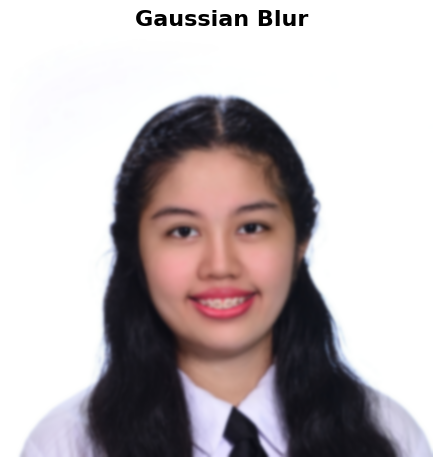

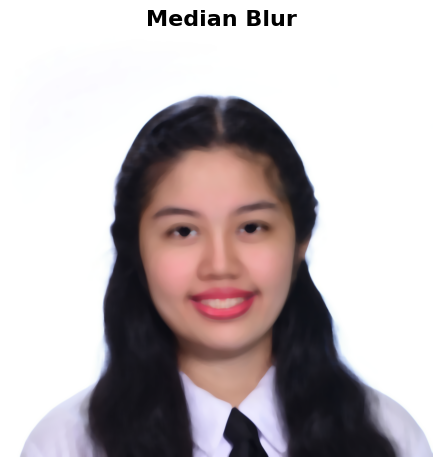

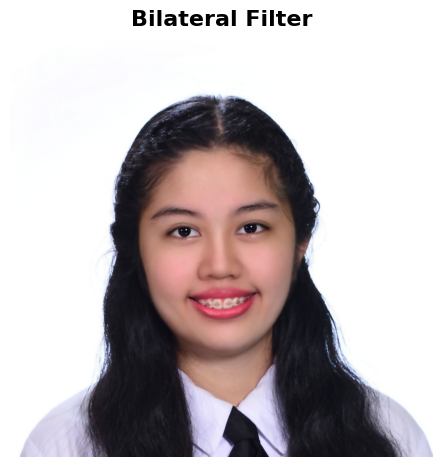

In [38]:

gaussian_blur = cv2.GaussianBlur(image, (41, 41), 0)
display_image(gaussian_blur, "Gaussian Blur")

median_blur = cv2.medianBlur(image, 31)
display_image(median_blur, "Median Blur")

bilateral_filter = cv2.bilateralFilter(image, 11, 75, 75)
display_image(bilateral_filter, "Bilateral Filter")

# **Exercise 3: Edge Detection using Canny**

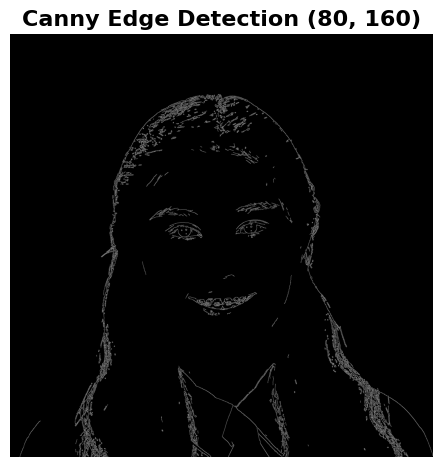

In [39]:
edge = cv2.Canny(image, 80, 160)
display_image(edge, "Canny Edge Detection (80, 160)")

# **Exercise 4: Basic Image Processor (Interactive)**

Enter action (Scale, Rotate, Gaussian_blur, Median_blur, Bilateral_filter, Canny_edge): Bilateral_filter


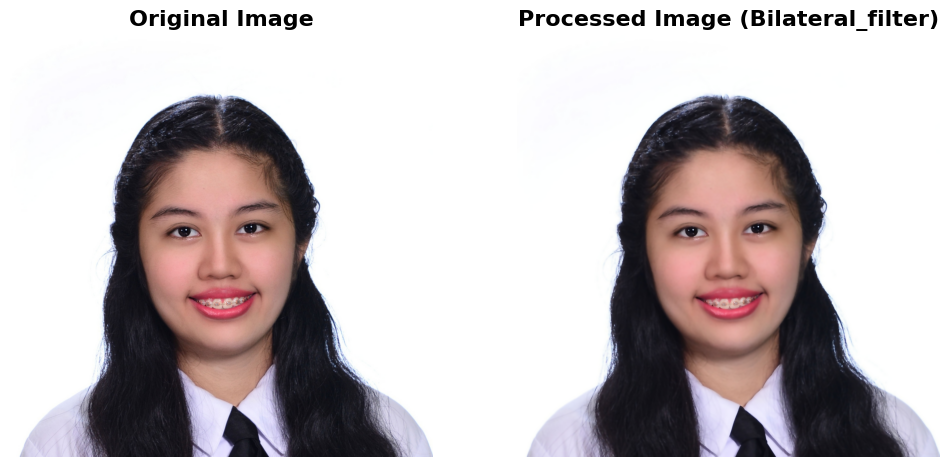

'\nThis allows users to enter their desired transformation interactively (via the\ninput() function). It processes the image and displays both the original and transformed\nversions side by side.\n'

In [40]:
def process_image(img, action):
  if action == 'Scale':
    return scale_image(image, 0.5)
  elif action == 'Rotate':
    return rotate_image(image, 45)
  elif action == 'Gaussian_blur':
    return cv2.GaussianBlur(image, (41, 41), 0)
  elif action == 'Median_blur':
    return cv2.medianBlur(image, 31)
  elif action == 'Bilateral_filter':
    return cv2.bilateralFilter(image, 11, 75, 75)
  elif action == 'Canny_edge':
    return cv2.Canny(image, 80, 160)
  else:
    return image

"""
process_image(): This function allows users to specify an image transformation (scaling,
rotation, blurring, or edge detection). Depending on the action passed, it will apply the
corresponding image processing technique and return the processed image.
"""
action = input("Enter action (Scale, Rotate, Gaussian_blur, Median_blur, Bilateral_filter, Canny_edge): ")
processed_image = process_image(image, action)
display_image_gray(image, processed_image, "Original Image", f"Processed Image ({action})")
"""
This allows users to enter their desired transformation interactively (via the
input() function). It processes the image and displays both the original and transformed
versions side by side.
"""

# **Exercise 5: Comparison of Filtering Techniques**

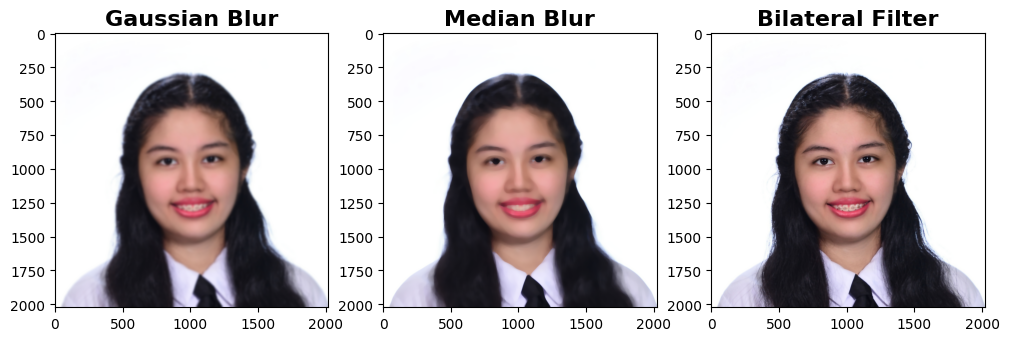

In [42]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (41, 41), 0)
median_blur = cv2.medianBlur(image, 31)
bilateral_filter = cv2.bilateralFilter(image, 11, 75, 75)
"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike
Gaussian or median filters. It’s useful for reducing noise while preserving details.
"""
# Display the results for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur", fontsize=16, fontweight='bold')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur", fontsize=16, fontweight='bold')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter", fontsize=16, fontweight='bold')
plt.show()

# **Exercise 6: Sobel Edge Detection Technique** bold text

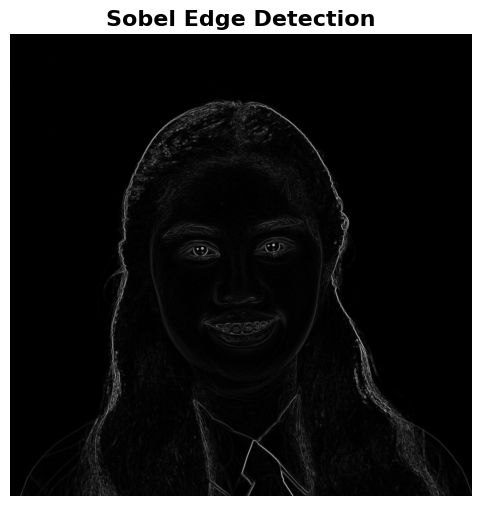

In [43]:
# Sobel Edge Detection
def sobel_edge_detection(img):
# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Sobel edge detection in the x direction
  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=7)
# Sobel edge detection in the y direction
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=7)
# Combine the two gradients
  sobel_combined = cv2.magnitude(sobelx, sobely)

  return sobel_combined
# Apply Sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)
plt.figure(figsize=(12, 6))
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

# **EXERCISE 7: Laplacian Edge Detection Technique**

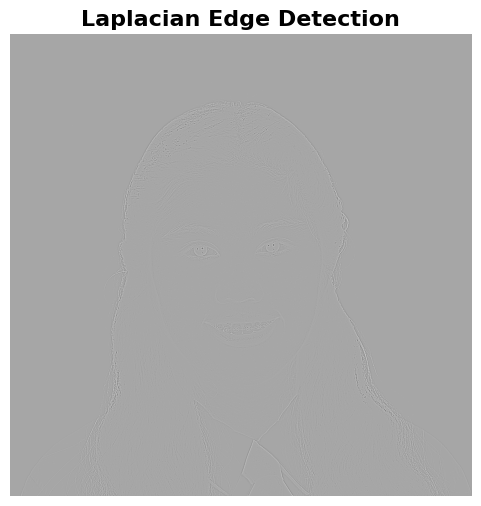

In [44]:

# Laplacian Edge Detection
def laplacian_edge_detection(img):
# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply Laplacian operator
  laplacian = cv2.Laplacian(gray, cv2.CV_64F)

  return laplacian
# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)
plt.figure(figsize=(12, 6))
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

# **Exercise 8: Prewitt Edge Detection Technique**

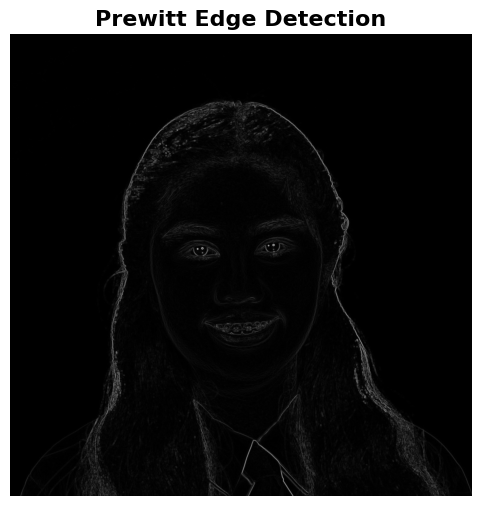

In [45]:
def prewitt_edge_detection(img):
# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Prewitt operator kernels for x and y directions
  kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
  kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
# Applying the Prewitt operator
  prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
  prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)
# Combine the x and y gradients by converting to floating point
  prewitt_combined = cv2.magnitude(prewittx, prewitty)

  return prewitt_combined
# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.figure(figsize=(12, 6))
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()


# **Exercise 9: Bilateral Filter**

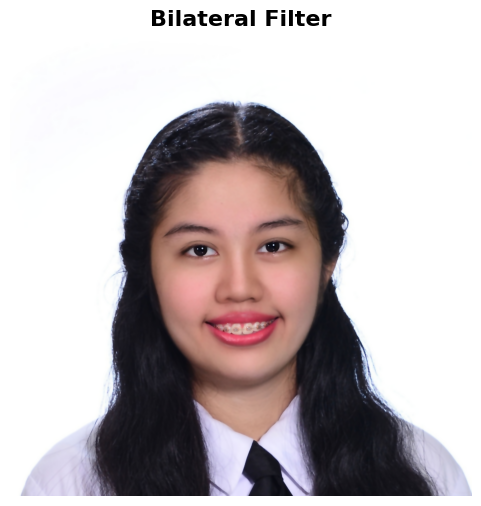

In [46]:
# Bilateral Filter
def bilateral_blur(img):
  bilateral = cv2.bilateralFilter(img, 11, 75, 75)

  return bilateral
# Apply Bilateral filter to the uploaded image
bilateral_blurred = bilateral_blur(image)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

# **Exercise 10: Box Filter**

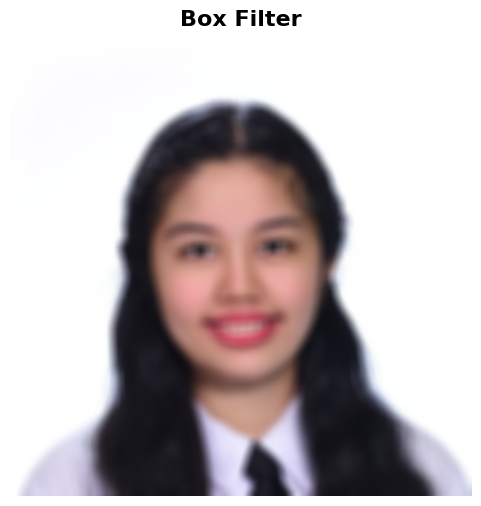

In [47]:
# Box Filter
def box_blur(img):
  box = cv2.boxFilter(img, -10, (50, 50))

  return box
# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()


# **Exercise 11: Motion Blur**

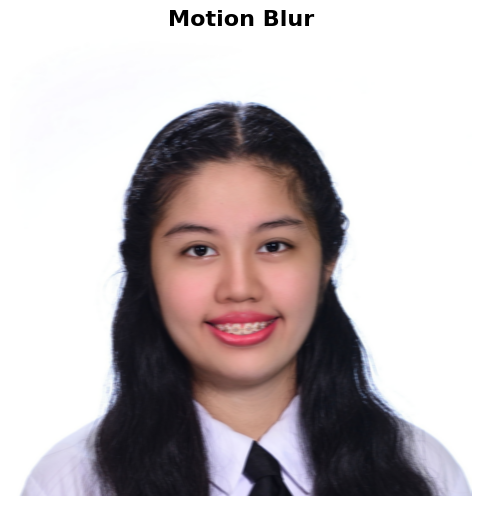

In [48]:
# Motion Blur
def motion_blur(img):
# Create motion blur kernel (size 15x15)
  kernel_size = 15
  kernel = np.zeros((kernel_size, kernel_size))
  kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
  kernel = kernel / kernel_size
# Apply motion blur
  motion_blurred = cv2.filter2D(img, -1, kernel)

  return motion_blurred
# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

# **Exercise 12: Unsharp Mark (Sharpening)**

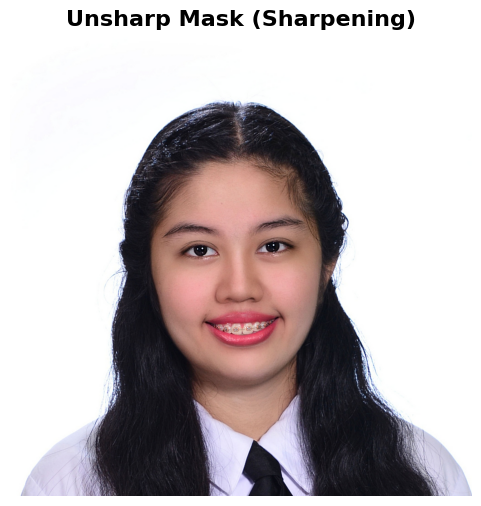

In [49]:
# Unsharp Masking (Sharpening)
def unsharp_mask(img):
# Create a Gaussian blur version of the image
  blurred = cv2.GaussianBlur(img, (9, 9), 10.0)
# Sharpen by adding the difference between the original and the blurred image
  sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

  return sharpened
# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

# **Exercise 13: Processes Image**

Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur, unsharp_mask)box_blur


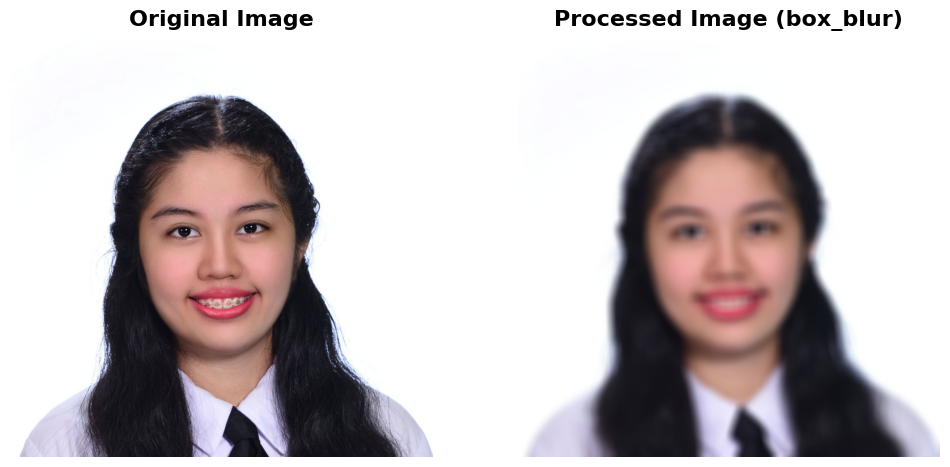

In [50]:
# Update process_image function to include new blurring techniques
def process_image(img, action):
  if action == 'scale':
    return scale_image(img, 0.5)
  elif action == 'rotate':
    return rotate_image(img, 45)
  elif action == 'gaussian_blur':
    return cv2.GaussianBlur(img, (41, 41), 0)
  elif action == 'median_blur':
    return cv2.medianBlur(img, 31)
  elif action == 'canny':
    return cv2.Canny(img, 80, 160)
  elif action == 'sobel':
    return sobel_edge_detection(img)
  elif action == 'laplacian':
    return laplacian_edge_detection(img)
  elif action == 'prewitt':
    return prewitt_edge_detection(img)
  elif action == 'bilateral_blur':
    return bilateral_blur(img)
  elif action == 'box_blur':
    return box_blur(img)
  elif action == 'motion_blur':
    return motion_blur(img)
  elif action == 'unsharp_mask':
    return unsharp_mask(img)
  else:
    return img

# Add new blurring options for interactive processing
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur, unsharp_mask)")
processed_image = process_image(image, action)
display_image_gray(image, processed_image, "Original Image", f"Processed Image ({action})")

# **Exercise 14: Conclusion**

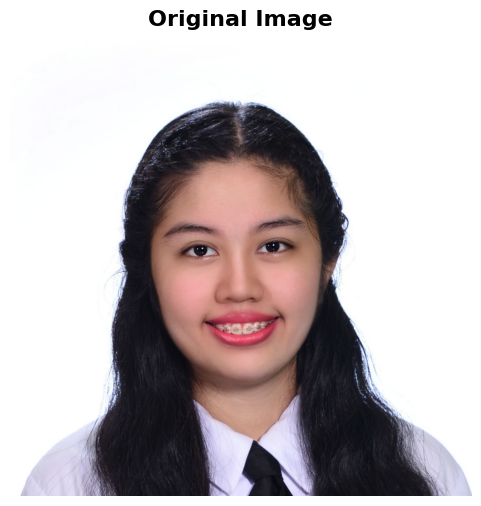

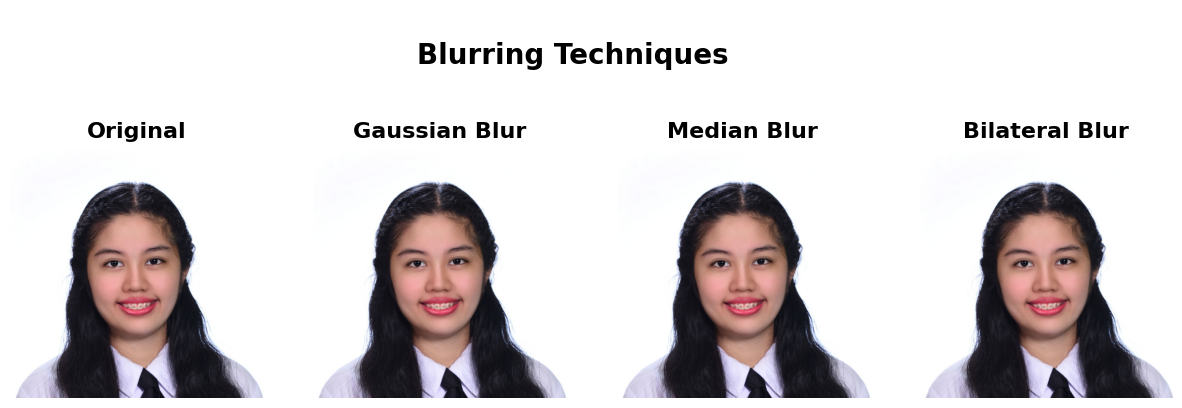

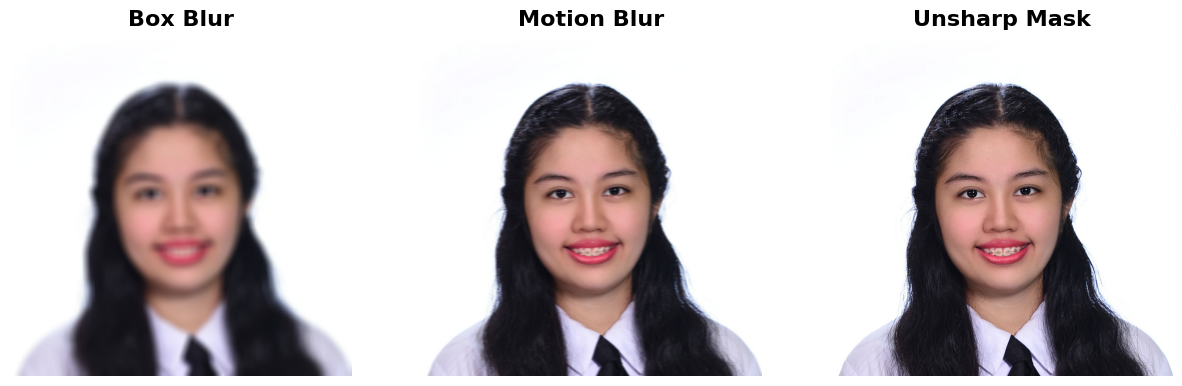

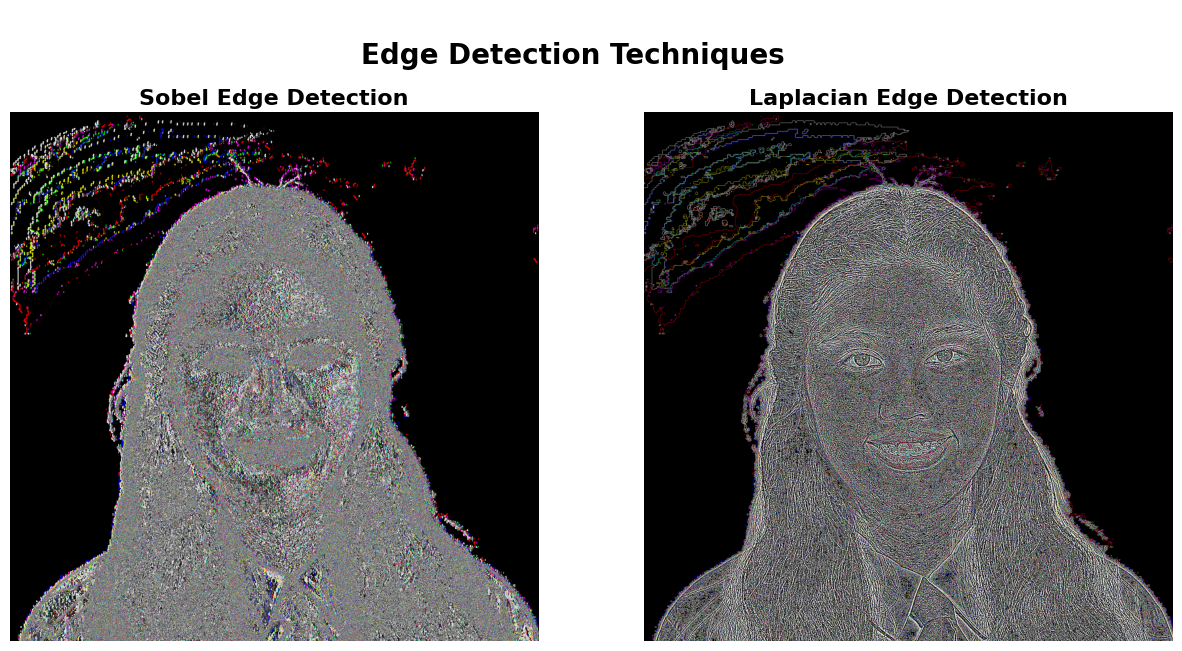

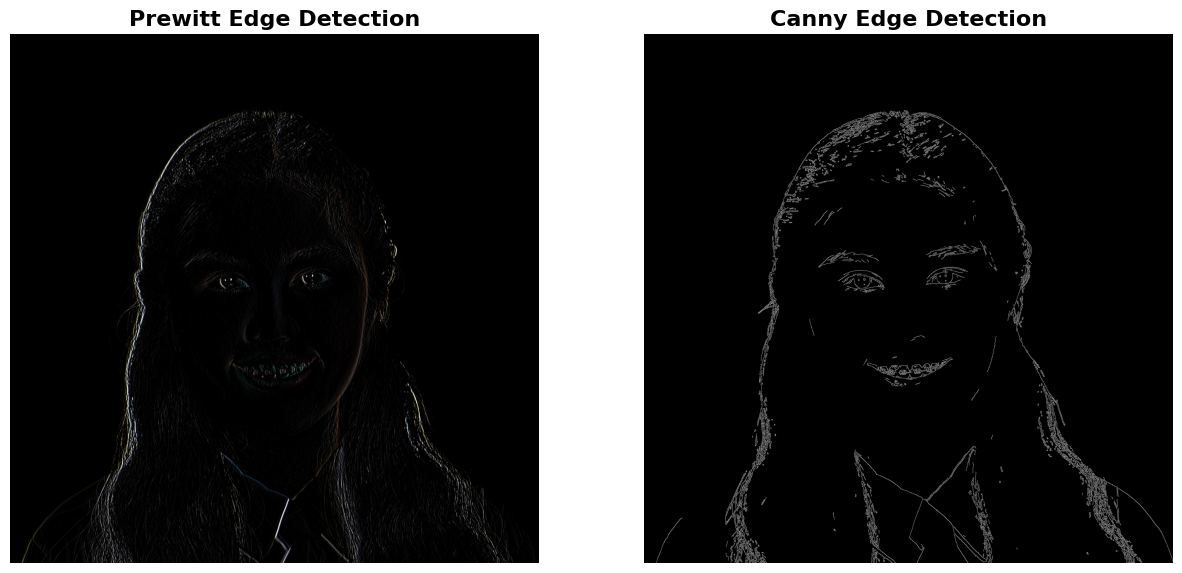

In [57]:
def display_images_horizontal(images, titles=None, figsize=(15, 5), global_title=None):
    plt.figure(figsize=figsize)

    if global_title:
        plt.suptitle(global_title, fontsize=20, fontweight='bold', y=1.02)

    num_images = len(images)
    for i in range(num_images):
        img = images[i]

        # Check if the image is a numpy array
        if not isinstance(img, np.ndarray):
            print(f"Warning: Image {i} is not a valid numpy array")
            continue  # Skip this image

        if img.ndim not in [2, 3]:
            print(f"Warning: Image {i} has invalid dimensions: {img.ndim}")
            continue  # Skip this image

        plt.subplot(1, num_images, i + 1)

        # Display grayscale images with gray colormap
        if img.ndim == 2:
            plt.imshow(img, cmap='gray')
        else:
            # Convert the image to uint8 before converting the color space
            img = img.astype(np.uint8)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        if titles:
            plt.title(titles[i], fontsize=16, fontweight='bold')
        plt.axis("off")

    plt.show()

images2 = [box_blurred, motion_blurred, sharpened_image]
titles2 = ["Box Blur", "Motion Blur", "Unsharp Mask"]

edge_images = [sobel_edges, laplacian_edges]
edge_titles = ["Sobel Edge Detection", "Laplacian Edge Detection"]

canny_edges = cv2.Canny(image, 80, 160)
edge_images2 = [prewitt_edges, canny_edges]
edge_titles2 = ["Prewitt Edge Detection", "Canny Edge Detection"]

display_image(image, "Original Image")
display_images_horizontal(images1, titles1, figsize=(15, 5), global_title="\nBlurring Techniques")
display_images_horizontal(images2, titles2, figsize=(15, 5))
display_images_horizontal(edge_images, edge_titles, figsize=(15, 7), global_title="\nEdge Detection Techniques")
display_images_horizontal(edge_images2, edge_titles2, figsize=(15, 7))
